With the following code we worked out 2 different graphs for each satellite:
- The first graph show the altitudes of each cluster for every minute from 01/01/2010 to 01/01/2012.
- In the second graph each bin tells the amount of time (in minutes) the satellite spent at a certain altitude range.

We then associated every altitude of a satellite to a datetime (from 01/01/2010 to 01/01/2012), and we repeated the same process for all 4 Cluster satellites.

In [1]:
import cdflib
import numpy as np
import pandas as pd
import numpy
from numpy import sqrt
import matplotlib.pyplot as plt

In [2]:
filename = r"C:\Users\franc\Pictures\Screenshots\C1_CP_AUX_POSGSE_1M__20100101_000000_20120101_000000_V120203.cdf"
#Open the file
cdf_file = cdflib.CDF(filename)

In [3]:
#Get info of the file
cdf_file.cdf_info()

{'CDF': WindowsPath('C:/Users/franc/Pictures/Screenshots/C1_CP_AUX_POSGSE_1M__20100101_000000_20120101_000000_V120203.cdf'),
 'Version': '3.7.0',
 'Encoding': 1,
 'Majority': 'Row_major',
 'rVariables': [],
 'zVariables': ['time_tags__C1_CP_AUX_POSGSE_1M',
  'sc_r_xyz_gse__C1_CP_AUX_POSGSE_1M',
  'sc_v_xyz_gse__C1_CP_AUX_POSGSE_1M',
  'sc_orb_num__C1_CP_AUX_POSGSE_1M',
  'sc_r_xyz_gse__C1_CP_AUX_POSGSE_1M_REPRESENTATION_1',
  'sc_r_xyz_gse__C1_CP_AUX_POSGSE_1M_LABEL_1',
  'sc_v_xyz_gse__C1_CP_AUX_POSGSE_1M_REPRESENTATION_1',
  'sc_v_xyz_gse__C1_CP_AUX_POSGSE_1M_LABEL_1'],
 'Attributes': [{'MISSION': 'Global'},
  {'MISSION_TIME_SPAN': 'Global'},
  {'MISSION_AGENCY': 'Global'},
  {'MISSION_DESCRIPTION': 'Global'},
  {'MISSION_KEY_PERSONNEL': 'Global'},
  {'MISSION_REFERENCES': 'Global'},
  {'MISSION_REGION': 'Global'},
  {'MISSION_CAVEATS': 'Global'},
  {'OBSERVATORY': 'Global'},
  {'OBSERVATORY_CAVEATS': 'Global'},
  {'OBSERVATORY_DESCRIPTION': 'Global'},
  {'OBSERVATORY_TIME_SPAN': 'Gl

In [4]:
#Get info of a parameter
cdf_file.varattsget(variable = 'sc_r_xyz_gse__C1_CP_AUX_POSGSE_1M')

{'PARAMETER_TYPE': 'Data',
 'CATDESC': 'GSE Position of Cluster 1 Spacecraft',
 'UNITS': 'km',
 'SI_CONVERSION': '1.0e3>m',
 'SIGNIFICANT_DIGITS': 6,
 'FILLVAL': -1e+31,
 'FIELDNAM': 'GSE Position of Cluster 1 Spacecraft',
 'LABLAXIS': 'Position',
 'ENTITY': 'Observatory',
 'PROPERTY': 'Vector',
 'FLUCTUATIONS': 'Waveform',
 'TENSOR_ORDER': 1,
 'COORDINATE_SYSTEM': 'GSE>Geocentric Solar Ecliptic',
 'REPRESENTATION_1': 'sc_r_xyz_gse__C1_CP_AUX_POSGSE_1M_REPRESENTATION_1',
 'QUALITY': 2,
 'DEPEND_0': 'time_tags__C1_CP_AUX_POSGSE_1M',
 'LABEL_1': 'sc_r_xyz_gse__C1_CP_AUX_POSGSE_1M_LABEL_1'}

In [5]:
datetimes1 = cdflib.cdfepoch.encode(cdf_file['time_tags__C1_CP_AUX_POSGSE_1M'])

In [6]:
datetimes1

['2010-01-01T00:00:00.000',
 '2010-01-01T00:01:00.000',
 '2010-01-01T00:02:00.000',
 '2010-01-01T00:03:00.000',
 '2010-01-01T00:04:00.000',
 '2010-01-01T00:05:00.000',
 '2010-01-01T00:06:00.000',
 '2010-01-01T00:07:00.000',
 '2010-01-01T00:08:00.000',
 '2010-01-01T00:09:00.000',
 '2010-01-01T00:10:00.000',
 '2010-01-01T00:11:00.000',
 '2010-01-01T00:12:00.000',
 '2010-01-01T00:13:00.000',
 '2010-01-01T00:14:00.000',
 '2010-01-01T00:15:00.000',
 '2010-01-01T00:16:00.000',
 '2010-01-01T00:17:00.000',
 '2010-01-01T00:18:00.000',
 '2010-01-01T00:19:00.000',
 '2010-01-01T00:20:00.000',
 '2010-01-01T00:21:00.000',
 '2010-01-01T00:22:00.000',
 '2010-01-01T00:23:00.000',
 '2010-01-01T00:24:00.000',
 '2010-01-01T00:25:00.000',
 '2010-01-01T00:26:00.000',
 '2010-01-01T00:27:00.000',
 '2010-01-01T00:28:00.000',
 '2010-01-01T00:29:00.000',
 '2010-01-01T00:30:00.000',
 '2010-01-01T00:31:00.000',
 '2010-01-01T00:32:00.000',
 '2010-01-01T00:33:00.000',
 '2010-01-01T00:34:00.000',
 '2010-01-01T00:35:0

In [7]:
df1 = pd.DataFrame({"datetime": datetimes1, 'px_gse1': cdf_file['sc_r_xyz_gse__C1_CP_AUX_POSGSE_1M'][:,0], 'py_gse1': cdf_file['sc_r_xyz_gse__C1_CP_AUX_POSGSE_1M'][:,1], 
                               'pz_gse1': cdf_file['sc_r_xyz_gse__C1_CP_AUX_POSGSE_1M'][:,2]})

In [8]:
#Close the CDF file.
cdf_file.close()

In [9]:
df1

,datetime,px_gse1,py_gse1,pz_gse1
0,2010-01-01T00:00:00.000,57627.378906,67378.773438,-61238.261719
1,2010-01-01T00:01:00.000,57623.031250,67300.046875,-61209.671875
2,2010-01-01T00:02:00.000,57618.609375,67221.257812,-61181.011719
3,2010-01-01T00:03:00.000,57614.128906,67142.398438,-61152.281250
4,2010-01-01T00:04:00.000,57609.570312,67063.460938,-61123.480469
...,...,...,...,...
1051195,2011-12-31T23:55:00.000,55959.800781,97467.796875,-70455.187500
1051196,2011-12-31T23:56:00.000,55989.050781,97446.101562,-70428.882812
1051197,2011-12-31T23:57:00.000,56018.269531,97424.343750,-70402.539062
1051198,2011-12-31T23:58:00.000,56047.449219,97402.523438,-70376.140625


In [10]:
#Accessing data in the columns of the dataframe
df1["px_gse1"]

0          57627.378906
1          57623.031250
2          57618.609375
3          57614.128906
4          57609.570312
               ...     
1051195    55959.800781
1051196    55989.050781
1051197    56018.269531
1051198    56047.449219
1051199    56076.589844
Name: px_gse1, Length: 1051200, dtype: float32

In [11]:
df1["py_gse1"]

0          67378.773438
1          67300.046875
2          67221.257812
3          67142.398438
4          67063.460938
               ...     
1051195    97467.796875
1051196    97446.101562
1051197    97424.343750
1051198    97402.523438
1051199    97380.640625
Name: py_gse1, Length: 1051200, dtype: float32

In [12]:
df1["pz_gse1"]

0         -61238.261719
1         -61209.671875
2         -61181.011719
3         -61152.281250
4         -61123.480469
               ...     
1051195   -70455.187500
1051196   -70428.882812
1051197   -70402.539062
1051198   -70376.140625
1051199   -70349.710938
Name: pz_gse1, Length: 1051200, dtype: float32

In [13]:
df1['Radius1'] = sqrt(((df1['px_gse1'])**2 + (df1['py_gse1']**2)) + (df1['pz_gse1'])**2) #/(6371) 
print(df1)

                        datetime       px_gse1       py_gse1       pz_gse1  \
0        2010-01-01T00:00:00.000  57627.378906  67378.773438 -61238.261719   
1        2010-01-01T00:01:00.000  57623.031250  67300.046875 -61209.671875   
2        2010-01-01T00:02:00.000  57618.609375  67221.257812 -61181.011719   
3        2010-01-01T00:03:00.000  57614.128906  67142.398438 -61152.281250   
4        2010-01-01T00:04:00.000  57609.570312  67063.460938 -61123.480469   
...                          ...           ...           ...           ...   
1051195  2011-12-31T23:55:00.000  55959.800781  97467.796875 -70455.187500   
1051196  2011-12-31T23:56:00.000  55989.050781  97446.101562 -70428.882812   
1051197  2011-12-31T23:57:00.000  56018.269531  97424.343750 -70402.539062   
1051198  2011-12-31T23:58:00.000  56047.449219  97402.523438 -70376.140625   
1051199  2011-12-31T23:59:00.000  56076.589844  97380.640625 -70349.710938   

               Radius1  
0        107754.062500  
1        1076

In [14]:
R_E = 6371
alt1 = (df1['Radius1'] - R_E)
print (alt1)

0          101383.062500
1          101315.273438
2          101247.390625
3          101179.414062
4          101111.328125
               ...      
1051195    126276.671875
1051196    126259.093750
1051197    126241.468750
1051198    126223.750000
1051199    126205.984375
Name: Radius1, Length: 1051200, dtype: float32


(0.0, 1000.0)

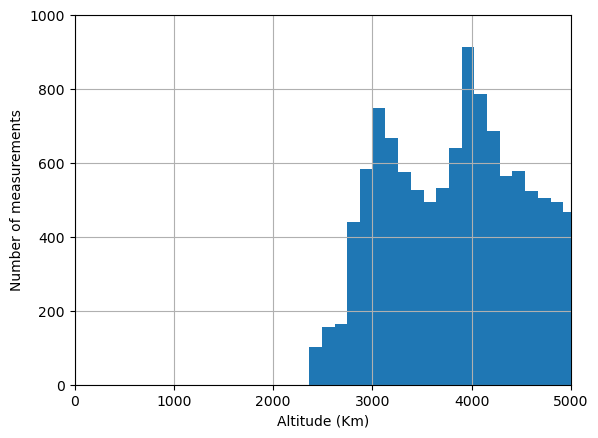

In [15]:
# x altitude
# y number of measuremets (minutes spent in that gap)

alt1.hist( by=None, grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, ax=None, figsize=None, bins=1000, backend=None, legend=False)
plt.xlabel('Altitude (Km)')
plt.ylabel('Number of measurements')
plt.xlim(0, 5000)
plt.ylim(0, 1000)

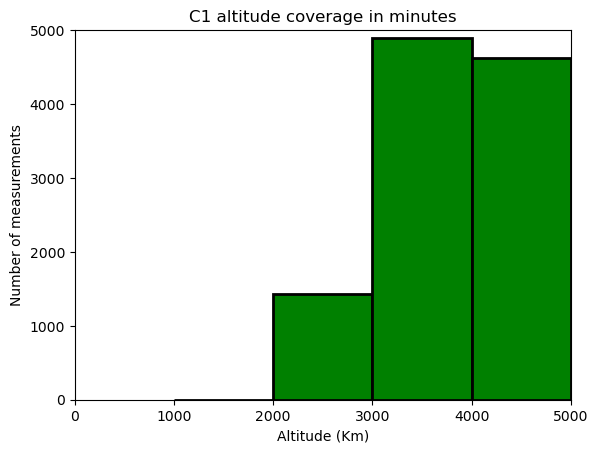

In [16]:
plt.hist(alt1, color = 'green', edgecolor = 'black', lw = 2, bins = [ 1000, 2000, 3000, 4000, 5000])
plt.xlim(0, 5000)
plt.ylim(0, 5000)
plt.title("C1 altitude coverage in minutes")
plt.xlabel('Altitude (Km)')
plt.ylabel('Number of measurements')
plt.show()


In [17]:
print(alt1.ravel())
alt1_min = np.argsort(alt1.ravel())
print(alt1_min)
for i in alt1_min[:1800]:
    print(alt1[i])
    print(datetimes1[i])

[101383.06  101315.27  101247.39  ... 126241.47  126223.75  126205.984]
[489284 489283 489285 ... 490912 490910 490911]
2362.8828
2010-12-06T18:44:00.000
2367.8623
2010-12-06T18:43:00.000
2374.457
2010-12-06T18:45:00.000
2380.4287
2010-12-09T00:59:00.000
2380.6758
2010-12-20T08:17:00.000
2380.755
2010-12-20T08:18:00.000
2383.288
2010-12-18T02:03:00.000
2383.6074
2010-12-18T02:02:00.000
2385.4658
2010-12-09T00:58:00.000
2387.836
2010-12-04T12:29:00.000
2389.338
2010-12-06T18:42:00.000
2390.3994
2010-12-04T12:28:00.000
2391.8682
2010-12-09T01:00:00.000
2397.0693
2010-12-20T08:16:00.000
2397.2852
2010-12-20T08:19:00.000
2399.412
2010-12-18T02:04:00.000
2400.3896
2010-12-18T02:01:00.000
2401.7148
2010-12-04T12:30:00.000
2402.4854
2010-12-06T18:46:00.000
2406.9277
2010-12-09T00:57:00.000
2409.3896
2010-12-04T12:27:00.000
2414.872
2010-12-15T19:47:00.000
2416.0215
2010-12-22T14:33:00.000
2419.6982
2010-12-09T01:01:00.000
2421.3486
2010-12-22T14:32:00.000
2421.499
2010-11-23T05:07:00.000
2421

In [18]:
filename = r"C:\Users\franc\Pictures\Screenshots\C2_CP_AUX_POSGSE_1M__20100101_000000_20120101_000000_V120203.cdf"
#Open the file
cdf_file = cdflib.CDF(filename)

In [19]:
#Get info of the file
cdf_file.cdf_info()

{'CDF': WindowsPath('C:/Users/franc/Pictures/Screenshots/C2_CP_AUX_POSGSE_1M__20100101_000000_20120101_000000_V120203.cdf'),
 'Version': '3.7.0',
 'Encoding': 1,
 'Majority': 'Row_major',
 'rVariables': [],
 'zVariables': ['time_tags__C2_CP_AUX_POSGSE_1M',
  'sc_r_xyz_gse__C2_CP_AUX_POSGSE_1M',
  'sc_v_xyz_gse__C2_CP_AUX_POSGSE_1M',
  'sc_orb_num__C2_CP_AUX_POSGSE_1M',
  'sc_r_xyz_gse__C2_CP_AUX_POSGSE_1M_REPRESENTATION_1',
  'sc_r_xyz_gse__C2_CP_AUX_POSGSE_1M_LABEL_1',
  'sc_v_xyz_gse__C2_CP_AUX_POSGSE_1M_REPRESENTATION_1',
  'sc_v_xyz_gse__C2_CP_AUX_POSGSE_1M_LABEL_1'],
 'Attributes': [{'MISSION': 'Global'},
  {'MISSION_TIME_SPAN': 'Global'},
  {'MISSION_AGENCY': 'Global'},
  {'MISSION_DESCRIPTION': 'Global'},
  {'MISSION_KEY_PERSONNEL': 'Global'},
  {'MISSION_REFERENCES': 'Global'},
  {'MISSION_REGION': 'Global'},
  {'MISSION_CAVEATS': 'Global'},
  {'OBSERVATORY': 'Global'},
  {'OBSERVATORY_CAVEATS': 'Global'},
  {'OBSERVATORY_DESCRIPTION': 'Global'},
  {'OBSERVATORY_TIME_SPAN': 'Gl

In [20]:
#Get info of a parameter
cdf_file.varattsget(variable = 'sc_r_xyz_gse__C2_CP_AUX_POSGSE_1M')

{'PARAMETER_TYPE': 'Data',
 'CATDESC': 'GSE Position of Cluster 2 Spacecraft',
 'UNITS': 'km',
 'SI_CONVERSION': '1.0e3>m',
 'SIGNIFICANT_DIGITS': 6,
 'FILLVAL': -1e+31,
 'FIELDNAM': 'GSE Position of Cluster 2 Spacecraft',
 'LABLAXIS': 'Position',
 'ENTITY': 'Observatory',
 'PROPERTY': 'Vector',
 'FLUCTUATIONS': 'Waveform',
 'TENSOR_ORDER': 1,
 'COORDINATE_SYSTEM': 'GSE>Geocentric Solar Ecliptic',
 'REPRESENTATION_1': 'sc_r_xyz_gse__C2_CP_AUX_POSGSE_1M_REPRESENTATION_1',
 'QUALITY': 2,
 'DEPEND_0': 'time_tags__C2_CP_AUX_POSGSE_1M',
 'LABEL_1': 'sc_r_xyz_gse__C2_CP_AUX_POSGSE_1M_LABEL_1'}

In [23]:
#Convert the epoch to datetimes
datetimes2 = cdflib.cdfepoch.encode(cdf_file['time_tags__C2_CP_AUX_POSGSE_1M'])

In [24]:
datetimes2

['2010-01-01T00:00:00.000',
 '2010-01-01T00:01:00.000',
 '2010-01-01T00:02:00.000',
 '2010-01-01T00:03:00.000',
 '2010-01-01T00:04:00.000',
 '2010-01-01T00:05:00.000',
 '2010-01-01T00:06:00.000',
 '2010-01-01T00:07:00.000',
 '2010-01-01T00:08:00.000',
 '2010-01-01T00:09:00.000',
 '2010-01-01T00:10:00.000',
 '2010-01-01T00:11:00.000',
 '2010-01-01T00:12:00.000',
 '2010-01-01T00:13:00.000',
 '2010-01-01T00:14:00.000',
 '2010-01-01T00:15:00.000',
 '2010-01-01T00:16:00.000',
 '2010-01-01T00:17:00.000',
 '2010-01-01T00:18:00.000',
 '2010-01-01T00:19:00.000',
 '2010-01-01T00:20:00.000',
 '2010-01-01T00:21:00.000',
 '2010-01-01T00:22:00.000',
 '2010-01-01T00:23:00.000',
 '2010-01-01T00:24:00.000',
 '2010-01-01T00:25:00.000',
 '2010-01-01T00:26:00.000',
 '2010-01-01T00:27:00.000',
 '2010-01-01T00:28:00.000',
 '2010-01-01T00:29:00.000',
 '2010-01-01T00:30:00.000',
 '2010-01-01T00:31:00.000',
 '2010-01-01T00:32:00.000',
 '2010-01-01T00:33:00.000',
 '2010-01-01T00:34:00.000',
 '2010-01-01T00:35:0

In [25]:
#Store the data in a pandas dataframe
df2 = pd.DataFrame({"datetime": datetimes2, 'px_gse2': cdf_file['sc_r_xyz_gse__C2_CP_AUX_POSGSE_1M'][:,0], 'py_gse2': cdf_file['sc_r_xyz_gse__C2_CP_AUX_POSGSE_1M'][:,1], 
                               'pz_gse2': cdf_file['sc_r_xyz_gse__C2_CP_AUX_POSGSE_1M'][:,2]})

In [27]:
#Close the CDF file.
cdf_file.close()

In [28]:
df2

,datetime,px_gse2,py_gse2,pz_gse2
0,2010-01-01T00:00:00.000,57325.199219,69405.046875,-61289.839844
1,2010-01-01T00:01:00.000,57313.410156,69326.367188,-61269.660156
2,2010-01-01T00:02:00.000,57301.550781,69247.617188,-61249.410156
3,2010-01-01T00:03:00.000,57289.621094,69168.789062,-61229.089844
4,2010-01-01T00:04:00.000,57277.621094,69089.890625,-61208.699219
...,...,...,...,...
1051195,2011-12-31T23:55:00.000,55425.980469,98204.382812,-75986.453125
1051196,2011-12-31T23:56:00.000,55450.558594,98184.171875,-75964.937500
1051197,2011-12-31T23:57:00.000,55475.101562,98163.906250,-75943.382812
1051198,2011-12-31T23:58:00.000,55499.609375,98143.593750,-75921.781250


In [29]:
#Accessing data in the columns of the dataframe
df2["px_gse2"]

0          57325.199219
1          57313.410156
2          57301.550781
3          57289.621094
4          57277.621094
               ...     
1051195    55425.980469
1051196    55450.558594
1051197    55475.101562
1051198    55499.609375
1051199    55524.078125
Name: px_gse2, Length: 1051200, dtype: float32

In [30]:
df2["py_gse2"]

0          69405.046875
1          69326.367188
2          69247.617188
3          69168.789062
4          69089.890625
               ...     
1051195    98204.382812
1051196    98184.171875
1051197    98163.906250
1051198    98143.593750
1051199    98123.218750
Name: py_gse2, Length: 1051200, dtype: float32

In [31]:
df2["pz_gse2"]

0         -61289.839844
1         -61269.660156
2         -61249.410156
3         -61229.089844
4         -61208.699219
               ...     
1051195   -75986.453125
1051196   -75964.937500
1051197   -75943.382812
1051198   -75921.781250
1051199   -75900.132812
Name: pz_gse2, Length: 1051200, dtype: float32

In [32]:

df2['Radius2'] = sqrt(((df2['px_gse2'])**2 + (df2['py_gse2']**2)) + (df2['pz_gse2'])**2) #/(6371) 
print(df2)

                        datetime       px_gse2       py_gse2       pz_gse2  \
0        2010-01-01T00:00:00.000  57325.199219  69405.046875 -61289.839844   
1        2010-01-01T00:01:00.000  57313.410156  69326.367188 -61269.660156   
2        2010-01-01T00:02:00.000  57301.550781  69247.617188 -61249.410156   
3        2010-01-01T00:03:00.000  57289.621094  69168.789062 -61229.089844   
4        2010-01-01T00:04:00.000  57277.621094  69089.890625 -61208.699219   
...                          ...           ...           ...           ...   
1051195  2011-12-31T23:55:00.000  55425.980469  98204.382812 -75986.453125   
1051196  2011-12-31T23:56:00.000  55450.558594  98184.171875 -75964.937500   
1051197  2011-12-31T23:57:00.000  55475.101562  98163.906250 -75943.382812   
1051198  2011-12-31T23:58:00.000  55499.609375  98143.593750 -75921.781250   
1051199  2011-12-31T23:59:00.000  55524.078125  98123.218750 -75900.132812   

               Radius2  
0        108902.171875  
1        1088

In [33]:
R_E = 6371
alt2 = (df2['Radius2'] - R_E)
print (alt2)

0          102531.171875
1          102463.476562
2          102395.679688
3          102327.773438
4          102259.765625
               ...      
1051195    129607.234375
1051196    129590.640625
1051197    129573.984375
1051198    129557.250000
1051199    129540.437500
Name: Radius2, Length: 1051200, dtype: float32


(0.0, 1000.0)

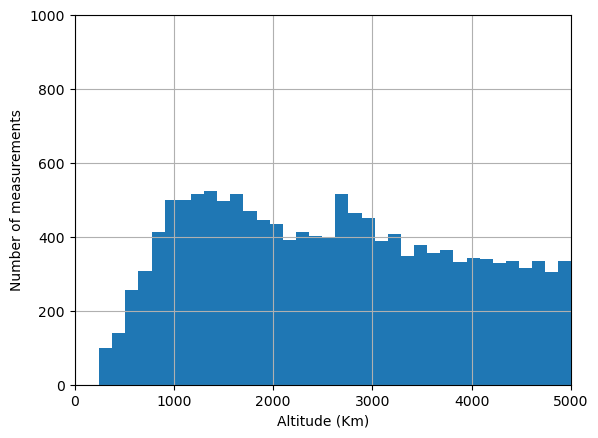

In [34]:
# x altitude
# y number of measuremets (minutes spent in that gap)

alt2.hist( by=None, grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, ax=None, figsize=None, bins=1000, backend=None, legend=False)
plt.xlabel('Altitude (Km)')
plt.ylabel('Number of measurements')
plt.xlim(0, 5000)
plt.ylim(0, 1000)

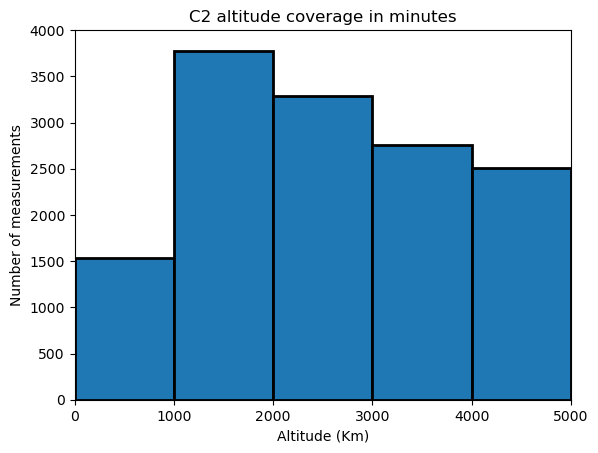

In [35]:
plt.hist(alt2, edgecolor = 'black', lw = 2, bins = [ 0, 1000, 2000, 3000, 4000, 5000])
plt.xlim(0, 5000)
plt.ylim(0, 4000)
plt.title("C2 altitude coverage in minutes")
plt.xlabel('Altitude (Km)')
plt.ylabel('Number of measurements')
plt.show()


In [36]:
print(alt2.ravel())
alt2_min = np.argsort(alt2.ravel())
print(alt2_min)
for i in alt2_min[:1600]:
    print(alt2[i])
    print(datetimes2[i])

[102531.17  102463.48  102395.68  ... 129573.984 129557.25  129540.44 ]
[743170 746424 743169 ... 744795 744796 744797]
245.48926
2011-06-01T02:10:00.000
247.45947
2011-06-03T08:24:00.000
248.6084
2011-06-01T02:09:00.000
249.40771
2011-06-16T21:53:00.000
250.90137
2011-06-14T15:39:00.000
255.03369
2011-06-16T21:52:00.000
257.64062
2011-06-03T08:23:00.000
260.76172
2011-06-14T15:40:00.000
266.77393
2011-06-03T08:25:00.000
270.7412
2011-06-14T15:38:00.000
271.95654
2011-05-29T19:55:00.000
272.0952
2011-06-01T02:11:00.000
273.46777
2011-06-16T21:54:00.000
279.0747
2011-06-05T14:38:00.000
279.99463
2011-06-05T14:39:00.000
281.4043
2011-06-01T02:08:00.000
282.1206
2011-05-20T18:54:00.000
282.16162
2011-06-12T09:25:00.000
284.5459
2011-05-29T19:56:00.000
286.35742
2011-06-19T04:06:00.000
288.87744
2011-05-29T19:54:00.000
290.271
2011-06-16T21:51:00.000
291.86377
2011-06-19T04:07:00.000
292.34375
2011-06-12T09:24:00.000
293.99512
2011-05-20T18:55:00.000
297.07373
2011-05-18T12:40:00.000
297.3

In [37]:
filename = r"C:\Users\franc\Pictures\Screenshots\C3_CP_AUX_POSGSE_1M__20100101_000000_20120101_000000_V120203.cdf"
#Open the file
cdf_file = cdflib.CDF(filename)

In [38]:
#Get info of the file
cdf_file.cdf_info()

{'CDF': WindowsPath('C:/Users/franc/Pictures/Screenshots/C3_CP_AUX_POSGSE_1M__20100101_000000_20120101_000000_V120203.cdf'),
 'Version': '3.7.0',
 'Encoding': 1,
 'Majority': 'Row_major',
 'rVariables': [],
 'zVariables': ['time_tags__C3_CP_AUX_POSGSE_1M',
  'sc_r_xyz_gse__C3_CP_AUX_POSGSE_1M',
  'sc_v_xyz_gse__C3_CP_AUX_POSGSE_1M',
  'sc_orb_num__C3_CP_AUX_POSGSE_1M',
  'sc_r_xyz_gse__C3_CP_AUX_POSGSE_1M_REPRESENTATION_1',
  'sc_r_xyz_gse__C3_CP_AUX_POSGSE_1M_LABEL_1',
  'sc_v_xyz_gse__C3_CP_AUX_POSGSE_1M_REPRESENTATION_1',
  'sc_v_xyz_gse__C3_CP_AUX_POSGSE_1M_LABEL_1'],
 'Attributes': [{'MISSION': 'Global'},
  {'MISSION_TIME_SPAN': 'Global'},
  {'MISSION_AGENCY': 'Global'},
  {'MISSION_DESCRIPTION': 'Global'},
  {'MISSION_KEY_PERSONNEL': 'Global'},
  {'MISSION_REFERENCES': 'Global'},
  {'MISSION_REGION': 'Global'},
  {'MISSION_CAVEATS': 'Global'},
  {'OBSERVATORY': 'Global'},
  {'OBSERVATORY_CAVEATS': 'Global'},
  {'OBSERVATORY_DESCRIPTION': 'Global'},
  {'OBSERVATORY_TIME_SPAN': 'Gl

In [39]:
cdf_file.varattsget(variable = 'sc_r_xyz_gse__C3_CP_AUX_POSGSE_1M')

{'PARAMETER_TYPE': 'Data',
 'CATDESC': 'GSE Position of Cluster 3 Spacecraft',
 'UNITS': 'km',
 'SI_CONVERSION': '1.0e3>m',
 'SIGNIFICANT_DIGITS': 6,
 'FILLVAL': -1e+31,
 'FIELDNAM': 'GSE Position of Cluster 3 Spacecraft',
 'LABLAXIS': 'Position',
 'ENTITY': 'Observatory',
 'PROPERTY': 'Vector',
 'FLUCTUATIONS': 'Waveform',
 'TENSOR_ORDER': 1,
 'COORDINATE_SYSTEM': 'GSE>Geocentric Solar Ecliptic',
 'REPRESENTATION_1': 'sc_r_xyz_gse__C3_CP_AUX_POSGSE_1M_REPRESENTATION_1',
 'QUALITY': 2,
 'DEPEND_0': 'time_tags__C3_CP_AUX_POSGSE_1M',
 'LABEL_1': 'sc_r_xyz_gse__C3_CP_AUX_POSGSE_1M_LABEL_1'}

In [40]:
#Convert the epoch to datetimes
datetimes3 = cdflib.cdfepoch.encode(cdf_file['time_tags__C3_CP_AUX_POSGSE_1M'])

In [41]:
datetimes3

['2010-01-01T00:00:00.000',
 '2010-01-01T00:01:00.000',
 '2010-01-01T00:02:00.000',
 '2010-01-01T00:03:00.000',
 '2010-01-01T00:04:00.000',
 '2010-01-01T00:05:00.000',
 '2010-01-01T00:06:00.000',
 '2010-01-01T00:07:00.000',
 '2010-01-01T00:08:00.000',
 '2010-01-01T00:09:00.000',
 '2010-01-01T00:10:00.000',
 '2010-01-01T00:11:00.000',
 '2010-01-01T00:12:00.000',
 '2010-01-01T00:13:00.000',
 '2010-01-01T00:14:00.000',
 '2010-01-01T00:15:00.000',
 '2010-01-01T00:16:00.000',
 '2010-01-01T00:17:00.000',
 '2010-01-01T00:18:00.000',
 '2010-01-01T00:19:00.000',
 '2010-01-01T00:20:00.000',
 '2010-01-01T00:21:00.000',
 '2010-01-01T00:22:00.000',
 '2010-01-01T00:23:00.000',
 '2010-01-01T00:24:00.000',
 '2010-01-01T00:25:00.000',
 '2010-01-01T00:26:00.000',
 '2010-01-01T00:27:00.000',
 '2010-01-01T00:28:00.000',
 '2010-01-01T00:29:00.000',
 '2010-01-01T00:30:00.000',
 '2010-01-01T00:31:00.000',
 '2010-01-01T00:32:00.000',
 '2010-01-01T00:33:00.000',
 '2010-01-01T00:34:00.000',
 '2010-01-01T00:35:0

In [42]:
df3 = pd.DataFrame({"datetime": datetimes3, 'px_gse3': cdf_file['sc_r_xyz_gse__C3_CP_AUX_POSGSE_1M'][:,0], 'py_gse3': cdf_file['sc_r_xyz_gse__C3_CP_AUX_POSGSE_1M'][:,1], 
                               'pz_gse3': cdf_file['sc_r_xyz_gse__C3_CP_AUX_POSGSE_1M'][:,2]})

In [43]:
cdf_file.close()

In [44]:
df3["px_gse3"]

0          58667.898438
1          58660.058594
2          58652.148438
3          58644.160156
4          58636.109375
               ...     
1051195    57998.761719
1051196    58025.851562
1051197    58052.910156
1051198    58079.929688
1051199    58106.910156
Name: px_gse3, Length: 1051200, dtype: float32

In [45]:
df3["py_gse3"]


0          66166.460938
1          66090.312500
2          66014.093750
3          65937.796875
4          65861.437500
               ...     
1051195    94896.976562
1051196    94877.109375
1051197    94857.179688
1051198    94837.203125
1051199    94817.148438
Name: py_gse3, Length: 1051200, dtype: float32

In [46]:
df3["pz_gse3"]

0         -63826.910156
1         -63797.828125
2         -63768.671875
3         -63739.449219
4         -63710.148438
               ...     
1051195   -73641.250000
1051196   -73613.656250
1051197   -73586.031250
1051198   -73558.359375
1051199   -73530.640625
Name: pz_gse3, Length: 1051200, dtype: float32

In [47]:
df3['Radius3'] = sqrt(((df3['px_gse3'])**2 + (df3['py_gse3']**2)) + (df3['pz_gse3'])**2) #/(6371) 
print(df3)

                        datetime       px_gse3       py_gse3       pz_gse3  \
0        2010-01-01T00:00:00.000  58667.898438  66166.460938 -63826.910156   
1        2010-01-01T00:01:00.000  58660.058594  66090.312500 -63797.828125   
2        2010-01-01T00:02:00.000  58652.148438  66014.093750 -63768.671875   
3        2010-01-01T00:03:00.000  58644.160156  65937.796875 -63739.449219   
4        2010-01-01T00:04:00.000  58636.109375  65861.437500 -63710.148438   
...                          ...           ...           ...           ...   
1051195  2011-12-31T23:55:00.000  57998.761719  94896.976562 -73641.250000   
1051196  2011-12-31T23:56:00.000  58025.851562  94877.109375 -73613.656250   
1051197  2011-12-31T23:57:00.000  58052.910156  94857.179688 -73586.031250   
1051198  2011-12-31T23:58:00.000  58079.929688  94837.203125 -73558.359375   
1051199  2011-12-31T23:59:00.000  58106.910156  94817.148438 -73530.640625   

               Radius3  
0        109058.687500  
1        1089

In [48]:
R_E = 6371
alt3 = (df3['Radius3'] - R_E)
print (alt3)

0          102687.687500
1          102620.257812
2          102552.726562
3          102485.085938
4          102417.343750
               ...      
1051195    127016.875000
1051196    126999.296875
1051197    126981.656250
1051198    126963.937500
1051199    126946.140625
Name: Radius3, Length: 1051200, dtype: float32


(0.0, 1000.0)

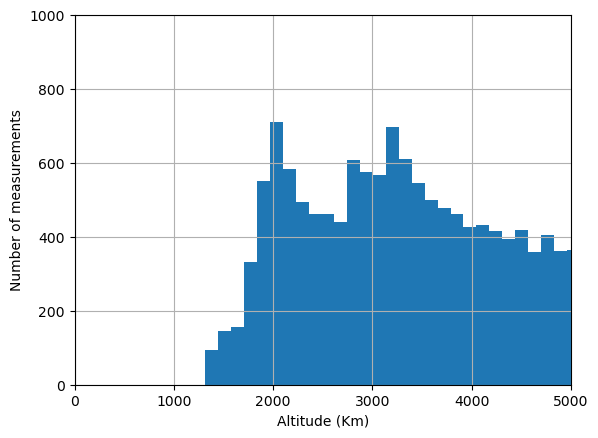

In [49]:
# x altitude
# y number of measuremets (minutes spent in that gap)

alt3.hist( by=None, grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, ax=None, figsize=None, bins=1000, backend=None, legend=False)
plt.xlabel('Altitude (Km)')
plt.ylabel('Number of measurements')
plt.xlim(0, 5000)
plt.ylim(0, 1000)

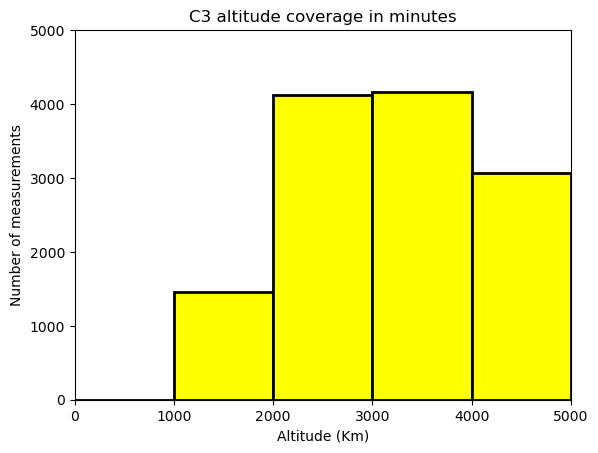

In [50]:
plt.hist(alt3,color = 'yellow', edgecolor = 'black', lw = 2, bins = [ 0, 1000, 2000, 3000, 4000, 5000])
plt.xlim(0, 5000)
plt.ylim(0, 5000)
plt.title("C3 altitude coverage in minutes")
plt.xlabel('Altitude (Km)')
plt.ylabel('Number of measurements')
plt.show()


In [51]:
print(alt3.ravel())
alt3_min = np.argsort(alt3.ravel())
print(alt3_min)
for i in alt3_min[:1800]:
    print(alt3[i])
    print(datetimes3[i])

[102687.69 102620.26 102552.73 ... 126981.66 126963.94 126946.14]
[489306 489305 489307 ... 487677 487678 487679]
1314.852
2010-12-06T19:06:00.000
1322.998
2010-12-06T19:05:00.000
1328.4033
2010-12-06T19:07:00.000
1334.1963
2010-12-09T01:21:00.000
1336.6182
2010-12-04T12:51:00.000
1338.5425
2010-12-04T12:50:00.000
1340.4863
2010-12-18T02:25:00.000
1342.9434
2010-12-20T08:40:00.000
1343.7197
2010-12-09T01:22:00.000
1346.2671
2010-12-09T01:20:00.000
1348.9551
2010-12-18T02:26:00.000
1349.0762
2010-12-20T08:41:00.000
1352.7549
2010-12-06T19:04:00.000
1353.5732
2010-12-18T02:24:00.000
1356.2749
2010-12-04T12:52:00.000
1358.3394
2010-12-20T08:39:00.000
1361.999
2010-12-04T12:49:00.000
1363.1533
2010-11-23T05:28:00.000
1363.5127
2010-12-06T19:08:00.000
1364.6978
2010-11-23T05:29:00.000
1369.4814
2010-12-15T20:10:00.000
1372.5645
2010-12-15T20:09:00.000
1372.6978
2010-12-11T07:37:00.000
1374.7334
2010-12-09T01:23:00.000
1376.5415
2010-11-20T23:13:00.000
1376.6841
2010-12-20T08:42:00.000
1378.

In [52]:
filename = r"C:\Users\franc\Pictures\Screenshots\C4_CP_AUX_POSGSE_1M__20100101_000000_20120101_000000_V120203.cdf"
#Open the file
cdf_file = cdflib.CDF(filename)

In [53]:
#Get info of the file
cdf_file.cdf_info()

{'CDF': WindowsPath('C:/Users/franc/Pictures/Screenshots/C4_CP_AUX_POSGSE_1M__20100101_000000_20120101_000000_V120203.cdf'),
 'Version': '3.7.0',
 'Encoding': 1,
 'Majority': 'Row_major',
 'rVariables': [],
 'zVariables': ['time_tags__C4_CP_AUX_POSGSE_1M',
  'sc_r_xyz_gse__C4_CP_AUX_POSGSE_1M',
  'sc_v_xyz_gse__C4_CP_AUX_POSGSE_1M',
  'sc_orb_num__C4_CP_AUX_POSGSE_1M',
  'sc_r_xyz_gse__C4_CP_AUX_POSGSE_1M_REPRESENTATION_1',
  'sc_r_xyz_gse__C4_CP_AUX_POSGSE_1M_LABEL_1',
  'sc_v_xyz_gse__C4_CP_AUX_POSGSE_1M_REPRESENTATION_1',
  'sc_v_xyz_gse__C4_CP_AUX_POSGSE_1M_LABEL_1'],
 'Attributes': [{'MISSION': 'Global'},
  {'MISSION_TIME_SPAN': 'Global'},
  {'MISSION_AGENCY': 'Global'},
  {'MISSION_DESCRIPTION': 'Global'},
  {'MISSION_KEY_PERSONNEL': 'Global'},
  {'MISSION_REFERENCES': 'Global'},
  {'MISSION_REGION': 'Global'},
  {'MISSION_CAVEATS': 'Global'},
  {'OBSERVATORY': 'Global'},
  {'OBSERVATORY_CAVEATS': 'Global'},
  {'OBSERVATORY_DESCRIPTION': 'Global'},
  {'OBSERVATORY_TIME_SPAN': 'Gl

In [54]:
cdf_file.varattsget(variable = 'sc_r_xyz_gse__C4_CP_AUX_POSGSE_1M')

{'PARAMETER_TYPE': 'Data',
 'CATDESC': 'GSE Position of Cluster 4 Spacecraft',
 'UNITS': 'km',
 'SI_CONVERSION': '1.0e3>m',
 'SIGNIFICANT_DIGITS': 6,
 'FILLVAL': -1e+31,
 'FIELDNAM': 'GSE Position of Cluster 4 Spacecraft',
 'LABLAXIS': 'Position',
 'ENTITY': 'Observatory',
 'PROPERTY': 'Vector',
 'FLUCTUATIONS': 'Waveform',
 'TENSOR_ORDER': 1,
 'COORDINATE_SYSTEM': 'GSE>Geocentric Solar Ecliptic',
 'REPRESENTATION_1': 'sc_r_xyz_gse__C4_CP_AUX_POSGSE_1M_REPRESENTATION_1',
 'QUALITY': 2,
 'DEPEND_0': 'time_tags__C4_CP_AUX_POSGSE_1M',
 'LABEL_1': 'sc_r_xyz_gse__C4_CP_AUX_POSGSE_1M_LABEL_1'}

In [55]:
datetimes4 = cdflib.cdfepoch.encode(cdf_file['time_tags__C4_CP_AUX_POSGSE_1M'])

In [56]:
datetimes4

['2010-01-01T00:00:00.000',
 '2010-01-01T00:01:00.000',
 '2010-01-01T00:02:00.000',
 '2010-01-01T00:03:00.000',
 '2010-01-01T00:04:00.000',
 '2010-01-01T00:05:00.000',
 '2010-01-01T00:06:00.000',
 '2010-01-01T00:07:00.000',
 '2010-01-01T00:08:00.000',
 '2010-01-01T00:09:00.000',
 '2010-01-01T00:10:00.000',
 '2010-01-01T00:11:00.000',
 '2010-01-01T00:12:00.000',
 '2010-01-01T00:13:00.000',
 '2010-01-01T00:14:00.000',
 '2010-01-01T00:15:00.000',
 '2010-01-01T00:16:00.000',
 '2010-01-01T00:17:00.000',
 '2010-01-01T00:18:00.000',
 '2010-01-01T00:19:00.000',
 '2010-01-01T00:20:00.000',
 '2010-01-01T00:21:00.000',
 '2010-01-01T00:22:00.000',
 '2010-01-01T00:23:00.000',
 '2010-01-01T00:24:00.000',
 '2010-01-01T00:25:00.000',
 '2010-01-01T00:26:00.000',
 '2010-01-01T00:27:00.000',
 '2010-01-01T00:28:00.000',
 '2010-01-01T00:29:00.000',
 '2010-01-01T00:30:00.000',
 '2010-01-01T00:31:00.000',
 '2010-01-01T00:32:00.000',
 '2010-01-01T00:33:00.000',
 '2010-01-01T00:34:00.000',
 '2010-01-01T00:35:0

In [57]:
df4 = pd.DataFrame({"datetime": datetimes4, 'px_gse4': cdf_file['sc_r_xyz_gse__C4_CP_AUX_POSGSE_1M'][:,0], 'py_gse4': cdf_file['sc_r_xyz_gse__C4_CP_AUX_POSGSE_1M'][:,1], 
                               'pz_gse4': cdf_file['sc_r_xyz_gse__C4_CP_AUX_POSGSE_1M'][:,2]})

In [58]:
cdf_file.close()

In [59]:
df4["px_gse4"]

0          58699.839844
1          58691.761719
2          58683.609375
3          58675.390625
4          58667.101562
               ...     
1051195    57988.769531
1051196    58015.878906
1051197    58042.960938
1051198    58070.000000
1051199    58097.011719
Name: px_gse4, Length: 1051200, dtype: float32

In [60]:
df4["py_gse4"]

0          65806.046875
1          65729.640625
2          65653.171875
3          65576.632812
4          65500.019531
               ...     
1051195    94868.296875
1051196    94848.429688
1051197    94828.492188
1051198    94808.500000
1051199    94788.453125
Name: py_gse4, Length: 1051200, dtype: float32

In [61]:
df4["pz_gse4"]

0         -63763.289062
1         -63733.941406
2         -63704.519531
3         -63675.031250
4         -63645.468750
               ...     
1051195   -73665.343750
1051196   -73637.750000
1051197   -73610.109375
1051198   -73582.421875
1051199   -73554.687500
Name: pz_gse4, Length: 1051200, dtype: float32

In [62]:
df4['Radius4'] = sqrt(((df4['px_gse4'])**2 + (df4['py_gse4']**2)) + (df4['pz_gse4'])**2) #/(6371) 
print(df4)

                        datetime       px_gse4       py_gse4       pz_gse4  \
0        2010-01-01T00:00:00.000  58699.839844  65806.046875 -63763.289062   
1        2010-01-01T00:01:00.000  58691.761719  65729.640625 -63733.941406   
2        2010-01-01T00:02:00.000  58683.609375  65653.171875 -63704.519531   
3        2010-01-01T00:03:00.000  58675.390625  65576.632812 -63675.031250   
4        2010-01-01T00:04:00.000  58667.101562  65500.019531 -63645.468750   
...                          ...           ...           ...           ...   
1051195  2011-12-31T23:55:00.000  57988.769531  94868.296875 -73665.343750   
1051196  2011-12-31T23:56:00.000  58015.878906  94848.429688 -73637.750000   
1051197  2011-12-31T23:57:00.000  58042.960938  94828.492188 -73610.109375   
1051198  2011-12-31T23:58:00.000  58070.000000  94808.500000 -73582.421875   
1051199  2011-12-31T23:59:00.000  58097.011719  94788.453125 -73554.687500   

               Radius4  
0        108820.328125  
1        1087

In [63]:
R_E = 6371
alt4 = (df4['Radius4'] - R_E)
print (alt4)

0          102449.328125
1          102381.585938
2          102313.726562
3          102245.781250
4          102177.734375
               ...      
1051195    127005.437500
1051196    126987.859375
1051197    126970.203125
1051198    126952.468750
1051199    126934.687500
Name: Radius4, Length: 1051200, dtype: float32


(0.0, 1000.0)

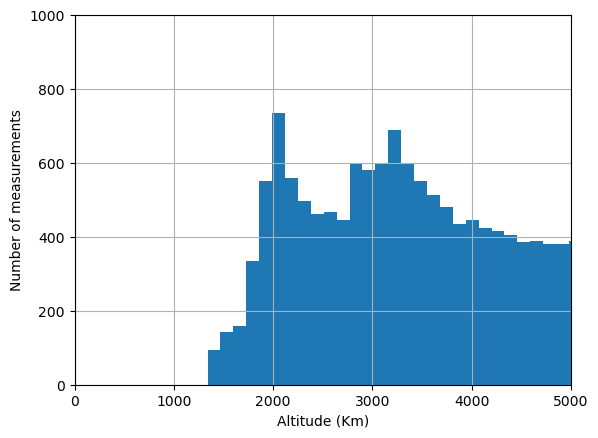

In [64]:
# x altitude
# y number of measuremets (minutes spent in that gap)

alt4.hist( by=None, grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, ax=None, figsize=None, bins=1000, backend=None, legend=False)
plt.xlabel('Altitude (Km)')
plt.ylabel('Number of measurements')
plt.xlim(0, 5000)
plt.ylim(0, 1000)

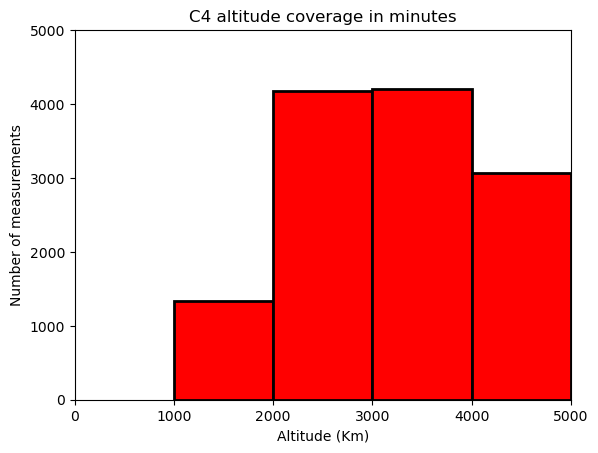

In [65]:
plt.hist(alt4, color = 'red', edgecolor = 'black', lw = 2, bins = [ 1000, 2000, 3000, 4000, 5000])
plt.xlim(0, 5000)
plt.ylim(0, 5000)
plt.title("C4 altitude coverage in minutes")
plt.xlabel('Altitude (Km)')
plt.ylabel('Number of measurements')
plt.show()


In [66]:
print(alt4.ravel())
alt4_min = np.argsort(alt4.ravel())
print(alt4_min)
for i in alt4_min[:1500]:
    print(alt4[i])
    print(datetimes4[i])

[102449.33  102381.586 102313.73  ... 126970.2   126952.47  126934.69 ]
[489241 489242 489240 ... 490869 490870 490868]
1338.2949
2010-12-06T18:01:00.000
1344.7109
2010-12-06T18:02:00.000
1353.4443
2010-12-06T18:00:00.000
1358.1973
2010-12-09T00:16:00.000
1358.6855
2010-12-04T11:46:00.000
1360.8721
2010-12-09T00:17:00.000
1365.0166
2010-12-18T01:20:00.000
1366.9961
2010-12-20T07:34:00.000
1368.1011
2010-12-04T11:45:00.000
1368.4658
2010-12-18T01:19:00.000
1368.7559
2010-12-20T07:35:00.000
1370.7075
2010-12-04T11:47:00.000
1372.6147
2010-12-06T18:03:00.000
1376.9575
2010-12-09T00:15:00.000
1382.9644
2010-12-18T01:21:00.000
1384.8452
2010-11-23T04:24:00.000
1384.9673
2010-12-09T00:18:00.000
1386.6401
2010-12-20T07:33:00.000
1389.9849
2010-12-06T17:59:00.000
1390.4087
2010-11-23T04:25:00.000
1391.873
2010-12-20T07:36:00.000
1393.2734
2010-12-18T01:18:00.000
1394.0161
2010-12-15T19:05:00.000
1395.0425
2010-12-15T19:04:00.000
1395.7661
2010-12-11T06:32:00.000
1398.852
2010-12-04T11:44:00.00